# WeatherPy
----

### Analysis
* When looking at the temperature relationship to latitude, the temperature seems to be increasing in the southeren hemisphere and the northeren hemisphere is having  low temperature. Also there is a high density of cities in the range of 60 - 90F.
* Looking at Latitude vs. Humidity, both sourthern and northern hemisphere seems to have high humdity. But by looking by the scatter plot its not definite. 
* The plot graph between Latitude vs Cloudiness, its pretty consistent when compared between southern and northern hemisphere.
* Majority of the cities have a wind speed of 0 to 15mph and there is no strong correlation between the northern and sourthern hemisphere.
---


In [2]:
# Dependencies and Setup
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:

today = str(date.today())
#print(today) 

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
#print(cities)
#print(cities[0])

619


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#loop through all rows and fill in values for blank columns in dataframe
setlimit = 1
city_data = []
print("Beginning Data Retrieval\n-----------------------------")

counter = 1
for idx,val in enumerate(cities):
    target_url = "http://api.openweathermap.org/data/2.5/weather?"
    # Create settings dictionary with information we're interested in
    settings = {"units": "imperial", "appid": api_key}
    # Get current weather
    try:
        # Wrapper makesx it easier to parse 
        current_weather_city = owm.get_current(val, **settings)

        print(f"Processing Record {counter} of set {setlimit} | {val}")
        counter += 1
        # Get wetaher data for the city
        summary = ["name", "clouds.all", "sys.country","dt","main.humidity",
                   "coord.lat","coord.lon","main.temp_max","wind.speed"]
        data = current_weather_city(*summary)
        city_data.append(data)
        #print(city_data)


        if counter == 51 :
            counter = 1
            setlimit += 1

    except Exception as e:
        print(f"City: {val} not found. Skipping...")
        pass

print("-----------------------------\nData Retrieval Complete\n-----------------------------")    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | sainte-marie
City: illoqqortoormiut not found. Skipping...
Processing Record 2 of set 1 | hambantota
Processing Record 3 of set 1 | colomi
Processing Record 4 of set 1 | sinalunga
Processing Record 5 of set 1 | safford
Processing Record 6 of set 1 | kenora
Processing Record 7 of set 1 | thompson
Processing Record 8 of set 1 | linhares
City: taolanaro not found. Skipping...
Processing Record 9 of set 1 | manika
Processing Record 10 of set 1 | cayenne
Processing Record 11 of set 1 | ushuaia
Processing Record 12 of set 1 | jamestown
Processing Record 13 of set 1 | east london
Processing Record 14 of set 1 | albany
Processing Record 15 of set 1 | schinnen
Processing Record 16 of set 1 | hobart
Processing Record 17 of set 1 | maldonado
Processing Record 18 of set 1 | sharjah
Processing Record 19 of set 1 | kushima
Processing Record 20 of set 1 | atuona
Processing Record 21 of set 1 | korablino
Processing R

Processing Record 37 of set 4 | butaritari
Processing Record 38 of set 4 | fortuna
Processing Record 39 of set 4 | alta floresta
Processing Record 40 of set 4 | mazyr
Processing Record 41 of set 4 | nortelandia
City: skagastrond not found. Skipping...
Processing Record 42 of set 4 | kangaatsiaq
Processing Record 43 of set 4 | avarua
Processing Record 44 of set 4 | saint-pierre
Processing Record 45 of set 4 | solhan
City: rolim de moura not found. Skipping...
City: puerto gaitan not found. Skipping...
Processing Record 46 of set 4 | batagay-alyta
Processing Record 47 of set 4 | nanortalik
Processing Record 48 of set 4 | botwood
Processing Record 49 of set 4 | cap-aux-meules
Processing Record 50 of set 4 | kazachinskoye
Processing Record 1 of set 5 | port hardy
Processing Record 2 of set 5 | geraldton
Processing Record 3 of set 5 | lipari
Processing Record 4 of set 5 | marica
Processing Record 5 of set 5 | kavaratti
Processing Record 6 of set 5 | staraya russa
Processing Record 7 of set 

Processing Record 17 of set 8 | pasni
Processing Record 18 of set 8 | qeshm
Processing Record 19 of set 8 | san andres
City: borlange not found. Skipping...
Processing Record 20 of set 8 | gavrilov-yam
Processing Record 21 of set 8 | ponazyrevo
Processing Record 22 of set 8 | santa rosalia
Processing Record 23 of set 8 | jiwani
Processing Record 24 of set 8 | mehamn
Processing Record 25 of set 8 | mareeba
Processing Record 26 of set 8 | meulaboh
City: berbera not found. Skipping...
Processing Record 27 of set 8 | quelimane
Processing Record 28 of set 8 | wana
Processing Record 29 of set 8 | gorin
Processing Record 30 of set 8 | lata
Processing Record 31 of set 8 | singleton
Processing Record 32 of set 8 | santo antonio do sudoeste
Processing Record 33 of set 8 | nipawin
Processing Record 34 of set 8 | baykit
Processing Record 35 of set 8 | daru
Processing Record 36 of set 8 | lagoa
Processing Record 37 of set 8 | buta
Processing Record 38 of set 8 | katangli
Processing Record 39 of set

Processing Record 46 of set 11 | mumbwa
Processing Record 47 of set 11 | udachnyy
Processing Record 48 of set 11 | hokitika
Processing Record 49 of set 11 | mogok
Processing Record 50 of set 11 | beloha
City: qui nhon not found. Skipping...
Processing Record 1 of set 12 | antofagasta
Processing Record 2 of set 12 | chumikan
Processing Record 3 of set 12 | dongsheng
Processing Record 4 of set 12 | jinchang
Processing Record 5 of set 12 | nakhon thai
Processing Record 6 of set 12 | maues
City: kyra not found. Skipping...
Processing Record 7 of set 12 | gao
Processing Record 8 of set 12 | bose
Processing Record 9 of set 12 | bintulu
Processing Record 10 of set 12 | begunitsy
Processing Record 11 of set 12 | semey
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
city_data_df = pd.DataFrame(city_data,columns = ['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed(mph)'])
city_data_df.count()

City               561
Cloudiness         561
Country            561
Date               561
Humidity           561
Lat                561
Lng                561
Max Temp           561
Wind Speed(mph)    561
dtype: int64

In [11]:
#convert date to local date and timestamp
city_data_df['Date'] = pd.to_datetime((city_data_df.Date), unit='s')
#city_data_df
#Output File (CSV)
output_data_file = "output_data/cities.csv"
city_data_df.to_csv(output_data_file,index=False, encoding='utf-8')
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed(mph)
0,Sainte-Marie,5,CA,2019-05-09 04:36:25,55,46.45,-71.03,39.0,3.36
1,Hambantota,0,LK,2019-05-09 04:10:00,66,6.12,81.12,87.8,13.87
2,Colomi,75,BO,2019-05-09 04:00:00,48,-17.34,-65.87,62.6,2.98
3,Sinalunga,100,IT,2019-05-09 04:37:21,58,43.21,11.74,55.4,5.82
4,Safford,40,US,2019-05-09 04:37:01,62,32.83,-109.71,59.0,13.87


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

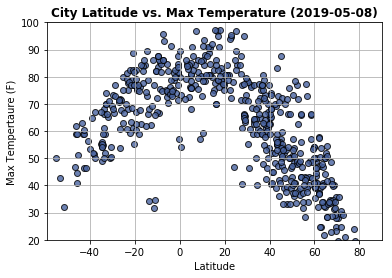

In [12]:
#Set the title,xlabel and ylabel using plt function  
date = city_data_df["Date"]
plt.title(f"City Latitude vs. Max Temperature ({today})",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Max Tempertaure (F)")
# Build the scatter plots for each city types
#source for color coding: https://www.computerhope.com/htmcolor.htm
plt.scatter(city_data_df.Lat,city_data_df['Max Temp'], marker="o",facecolors="#4863A0",
            edgecolors="black", alpha = 0.80)

# Incorporate the other graph properties
plt.grid()
plt.xlim(-59,90)
plt.ylim(20,100)
# # Save Figure
plt.savefig("lat_vs_max_temperature_scatter.png")
plt.show()

#### Latitude vs. Humidity Plot

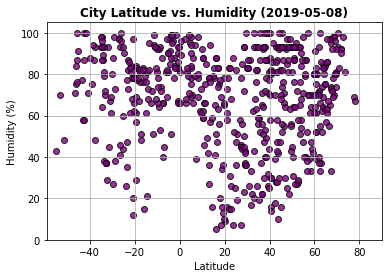

In [13]:
#Set the title,xlabel and ylabel using plt function  
plt.title(f"City Latitude vs. Humidity ({today})",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Build the scatter plots for each city types
#source for color coding: https://www.computerhope.com/htmcolor.htm
plt.scatter(city_data_df.Lat,city_data_df['Humidity'], marker="o",facecolors="#800080",
            edgecolors="black", alpha = 0.80)

# Incorporate the other graph properties
plt.grid()
plt.xlim(-59,90)
plt.ylim(0,105)
# # Save Figure
plt.savefig("lat_vs_humidity_scatter.png")
plt.show()

#### Latitude vs. Cloudiness Plot

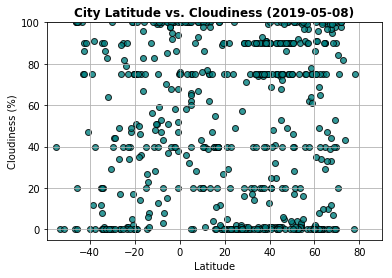

In [14]:
#Set the title,xlabel and ylabel using plt function  
plt.title(f"City Latitude vs. Cloudiness ({today})",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Build the scatter plots for each city types
#source for color coding: https://www.computerhope.com/htmcolor.htm
plt.scatter(city_data_df.Lat,city_data_df['Cloudiness'], marker="o",facecolors="#008080",
            edgecolors="black", alpha = 0.80)

# Incorporate the other graph properties
plt.grid()
plt.xlim(-59,90)
plt.ylim(-5,100)
# # Save Figure
plt.savefig("lat_vs_cloudiness_scatter.png")
plt.show()

#### Latitude vs. Wind Speed Plot

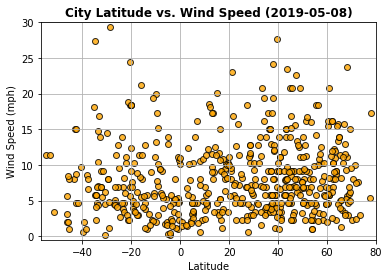

In [15]:
#Set the title,xlabel and ylabel using plt function  
plt.title(f"City Latitude vs. Wind Speed ({today})",fontweight='bold')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# Build the scatter plots for each city types
#source for color coding: https://www.computerhope.com/htmcolor.htm
plt.scatter(city_data_df.Lat,city_data_df['Wind Speed(mph)'], marker="o",facecolors="#FFA500",
            edgecolors="black", alpha = 0.80)

# Incorporate the other graph properties
plt.grid()
plt.xlim(-57,80)
plt.ylim(-0.5,30)
# # Save Figure
plt.savefig("lat_vs_windspeed_scatter.png")
plt.show()